In [1]:
import numpy as np

In [201]:
def find_period_classical(x, N):
    n = 1
    t = x
    print(f"Para el paso:{n}-> {n}X{x} = {t}")
    while t != 1:
        #t *= x
        #t %= N
        t_ant = t
        t = np.mod(t*x, N)
        n += 1
        
        print(f"Para el paso:{n}-> {t_ant}X{x} = {t}")

    return n

In [202]:
def find_period_ext(x, N, x_max):
    n = 1
    periodo = 0
    t = x
    y_val = []
    y_val.append(t)

    #print(f"Para el paso:{n}-> {n}X{x} = {t}")
    while n < x_max:
        #t *= x
        #t %= N
        t_ant = t
        t = np.mod(t*x, N)
        y_val.append(t)
        n += 1
        if (t == 1 and periodo == 0):
            periodo = n
        #print(f"Para el paso:{n}-> {t_ant}X{x} = {t}")
    return periodo, y_val

In [211]:
a = 7
N = 15
x_max = 15
periodo, y_val = find_period_ext(a, N, x_max)

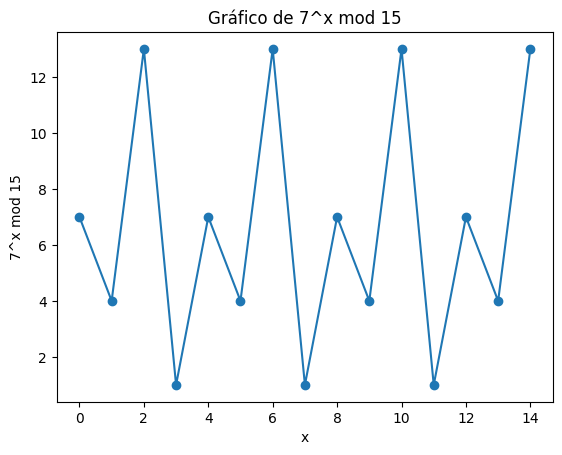

In [212]:
plt.plot(y_val,  marker='o', linestyle='-')
plt.xlabel('x')

plt.ylabel(f'{a}^x mod {N}')
plt.title(f'Gráfico de {a}^x mod {N}')
plt.show()

In [213]:
print(f"Periodo de la Fórmula= {periodo}")

Periodo de la Fórmula= 4


In [207]:
import math
import random

def shors_algorithm_classical(N):
    x = random.randint(0,N) # step one
    if(math.gcd(x,N) != 1): # step two
        return x,0,math.gcd(x,N),N/math.gcd(x,N)
    r = find_period_classical(x,N) # step three
    while(r % 2 != 0):
        r = find_period_classical(x,N)
    p = math.gcd(x**int(r/2)+1,N) # step four, ignoring the case where (x^(r/2) +/- 1) is a multiple of N
    q = math.gcd(x**int(r/2)-1,N)
    return x,r,p,q


In [214]:
x,r,p,q = shors_algorithm_classical(N)
print(f"semiprime N = {N} coprime x = {x} period r = {r} prime factors = {p} and {q}")


Para el paso:1-> 1X13 = 13
Para el paso:2-> 13X13 = 4
Para el paso:3-> 4X13 = 7
Para el paso:4-> 7X13 = 1
semiprime N = 15 coprime x = 13 period r = 4 prime factors = 5 and 3


#Versión Cuántica
Vamos ahora a implementar el algoritmo de manera Cuántica

In [ ]:
precision = 4

In [48]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer

# import basic plot tools and circuits
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [49]:
def inv_qft(circuit, q_reg):
    # Aplicar la QFT al registro cuántico especificado
    circuit.append(QFT(len(q_reg)).inverse(), q_reg)

In [50]:
def cont_u(qc, q_control, q_target, control_count):
  if (control_count & 1):
    qc.ch(q_control[control_count-1], q_target[0])

In [51]:
def count_u(circuit, control_qubits, target_qubit, unitary):
    """
    Aplica la operación controlada U^k a un circuito cuántico para la estimación de fase.

    Parámetros:
    - circuit: el circuito cuántico donde se aplicará la operación.
    - control_qubits: los qubits de control (pueden ser múltiples qubits).
    - target_qubit: el qubit objetivo sobre el que actúa la operación U.
    - unitary: la unidadaria U que se va a aplicar de manera controlada.
    """
    for i, control_qubit in enumerate(control_qubits):
        # Calcular la potencia U^(2^i)
        exponent = 2**i
        controlled_unitary = unitary.power(exponent).control()

        # Aplicar U^(2^i) controlada por el qubit control_qubit
        circuit.append(controlled_unitary, [control_qubit] + [target_qubit])


In [52]:
def phase_est(qc, q_in, q_out, control_u ):
  for qubit in q_out:
      qc.h(qubit)

  for j in range(len(q_out)):
    cont_u(qc, q_out, q_in, 1 << j)


In [53]:
def init(qc, reg_in, angle):
  # Convertir -135 grados a radianes
  angle = angle * math.pi / 180

  # Aplicar la rotación en Y a cada qubit en q_in con el ángulo dado
  for qubit in reg_in:
      qc.ry(angle, qubit)

In [80]:
# Crear un registro cuántico de entrada con 1 qubits
q_input = QuantumRegister(1, 'in')

# Crear un registro cuántico de salida con 4 qubits
q_output = QuantumRegister(4, 'out')

# Crear un registro clásico para medir los qubits de salida con 4 bits
c_output = ClassicalRegister(4, 'c_output')

# Crear el circuito cuántico con los registros definidos
qc = QuantumCircuit(q_output, q_input, c_output)


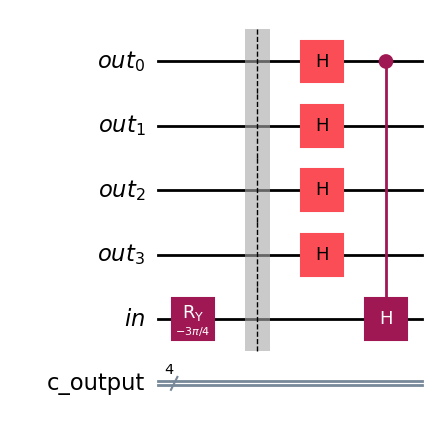

In [81]:
init(qc, q_input, -135)
qc.barrier()
phase_est(qc, q_input, q_output, cont_u)
qc.draw(output='mpl')


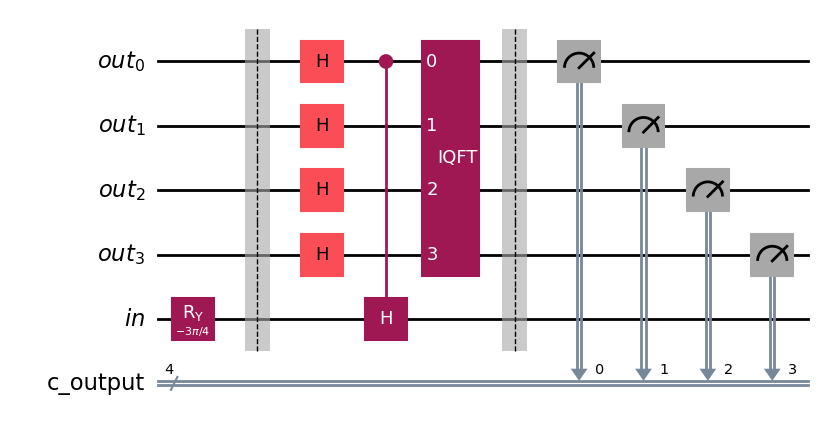

In [82]:
inv_qft(qc, q_output)
qc.barrier()
qc.measure(q_output, c_output)
qc.draw(output='mpl')

In [83]:
simulator = Aer.get_backend('qasm_simulator')

# Compilar y ensamblar el circuito cuántico
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=2048)

result = job.result()
counts = result.get_counts(qc)
print(counts)


{'1000': 2048}


In [199]:
from qiskit.circuit.library import phase_estimation

phase = phase_estimation
                         
# Crear el circuito cuántico de Shor
circuit = shor.construct_circuit(N)

# Visualizar el circuito
circuit.draw(output='mpl')  # Dibuja el circuito y lo muestra

ImportError: cannot import name 'Shor' from 'qiskit.circuit.library' (/home/jupyter-lmbibbo/.local/lib/python3.10/site-packages/qiskit/circuit/library/__init__.py)